In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [10]:
df1 = pd.read_csv('ACCOUNTS.csv')
df2 = pd.read_csv('DEMOGRAPHICS.csv')
df3 = pd.read_csv('LOANS.csv')

In [11]:
df1

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0
...,...,...,...,...,...
2472,636739,163.82,CREDITS_PAID_TO_DATE,472.11,1.0
2473,919733,14324.23,PRIOR_PAYMENTS_DELAYED,18652.44,1.0
2474,115839,130.13,PRIOR_PAYMENTS_DELAYED,726.78,2.0
2475,1128684,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN,1.0


In [12]:
df2

,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3931,636739,F,41.0,0.0,1.0,0.0,1.0,7.0,CAR_OTHER,OWN,3.0
3932,919733,M,46.0,3.0,1.0,1.0,1.0,11.0,SAVINGS_INSURANCE,OWN,3.0
3933,115839,M,28.0,3.0,1.0,1.0,1.0,7.0,CAR_OTHER,RENT,1.0
3934,1128684,M,46.0,0.0,1.0,0.0,1.0,7.0,CAR_OTHER,RENT,3.0


In [13]:
df3

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0
...,...,...,...,...,...,...,...,...
3994,636739,450.0,BANK,3.0,CAR_NEW,3007.0,CO-APPLICANT,0
3995,919733,510.0,NONE,4.0,VACATION,4191.0,GUARANTOR,1
3996,115839,124.0,STORES,1.0,FURNITURE,250.0,NONE,1
3997,1128684,961.0,BANK,3.0,BUSINESS,5172.0,NONE,1


## Visão Geral

Compreender cada informação coletada é essencial para um possível modelo que será gerado. Nesse sentido, gera-se uma análise inicial de cada variável (ou coluna) foi coletada e justifica-se o porque dessa variável não será considerada no modelo ou até mesmo, qual tratamento de dados será utilizado nela.

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2477 non-null   int64  
 1   CHECKING_BALANCE        2467 non-null   object 
 2   CREDIT_HISTORY          2462 non-null   object 
 3   EXISTING_SAVINGS        2467 non-null   object 
 4   EXISTING_CREDITS_COUNT  2463 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.9+ KB


A função <strong>info()</strong> já mostra um resumo geral do comportamento dos dados, apesar de superficial é possível observar que os dados estão desbalanceados, ou seja, será necessário realizar uma análise exploratória individual de cada variável e posteriormente realizar um tratamento e limpeza de informações que não terão impacto no modelo de classificação que se almeja construir.

## Análise Inicial de Dados


In [14]:
df1.corr() 

,ID,EXISTING_CREDITS_COUNT
ID,1.000000,-0.003681
EXISTING_CREDITS_COUNT,-0.003681,1.000000


In [20]:
df1[df1['CHECKING_BALANCE']=='NO_CHECKING']

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0
6,1096578,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,421.96,1.0
10,1136574,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,383.57,1.0
12,1268579,NO_CHECKING,OUTSTANDING_CREDIT,572.37,2.0
...,...,...,...,...,...
2468,827553,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,615.54,2.0
2469,145488,NO_CHECKING,OUTSTANDING_CREDIT,33154.86,2.0
2470,178072,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,726.26,2.0
2475,1128684,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN,1.0


In [23]:
df1[df1['EXISTING_SAVINGS']=='UNKNOWN']

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
23,1049084,NO_CHECKING,OUTSTANDING_CREDIT,UNKNOWN,2.0
26,1177670,NO_CHECKING,OUTSTANDING_CREDIT,UNKNOWN,2.0
31,584707,NO_CHECKING,OUTSTANDING_CREDIT,UNKNOWN,2.0
32,100984,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN,3.0
36,29700,NO_CHECKING,OUTSTANDING_CREDIT,UNKNOWN,2.0
...,...,...,...,...,...
2380,514189,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN,2.0
2429,816269,NO_CHECKING,OUTSTANDING_CREDIT,UNKNOWN,2.0
2438,1152672,97.91,OUTSTANDING_CREDIT,UNKNOWN,2.0
2475,1128684,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN,1.0


### 1) Saldos verificados e saldos não verificados

In [106]:
# Dividi-se o dataset em 2, onde a variável check é compreendida pelas informações numéricas.
no_check = len(df1[df1[u'CHECKING_BALANCE'] == 'NO_CHECKING'])
check = len(df1[df1[u'CHECKING_BALANCE'] != 'NO_CHECKING'])

new_df = {'NO_CHECKING': [no_check], 'CHECKING': [check]}

checking_balance = pd.DataFrame(data=new_df)

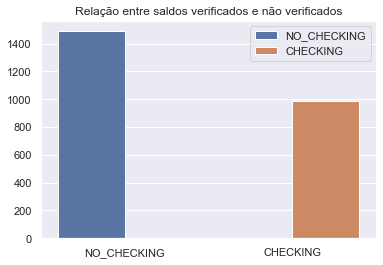

In [105]:
sns.set(style="darkgrid")

fig = sns.barplot(x=list(checking_balance) ,y=[checking_balance['CHECKING'].iloc[0],checking_balance['NO_CHECKING'].iloc[0]],hue=list(checking_balance))
plt.title("Relação entre saldos verificados e não verificados")
plt.show(fig)

## 2) Histórico de Crédito

In [109]:
df1['CREDIT_HISTORY'].unique()

array(['ALL_CREDITS_PAID_BACK', 'CREDITS_PAID_TO_DATE',
       'PRIOR_PAYMENTS_DELAYED', 'OUTSTANDING_CREDIT', 'NO_CREDITS', nan],
      dtype=object)

## 3) Economias Existentes

In [112]:
# Dividi-se o dataset em 2, onde a variável check é compreendida pelas informações numéricas.
exis = len(df1[df1[u'EXISTING_SAVINGS'] != 'UNKNOWN'])
no_exis = len(df1[df1[u'EXISTING_SAVINGS'] == 'UNKNOWN'])

new_df2 = {'EXISTING_SAVINGS': [exis], 'NO_EXISTING_SAVINGS': [no_exis]}

check_savings = pd.DataFrame(data=new_df2)

In [113]:
check_savings

,EXISTING_SAVINGS,NO_EXISTING_SAVINGS
0,2301,176


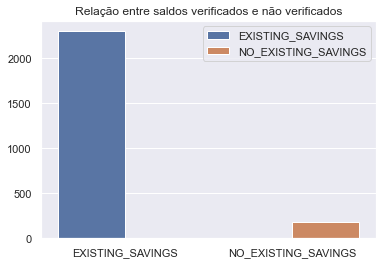

In [115]:
sns.set(style="darkgrid")

fig = sns.barplot(x=list(check_savings) ,y=[check_savings['EXISTING_SAVINGS'].iloc[0],check_savings['NO_EXISTING_SAVINGS'].iloc[0]],hue=list(check_savings))
plt.title("Relação entre saldos verificados e não verificados")
plt.show(fig)

In [117]:
df1[df1['EXISTING_CREDITS_COUNT'].isnull()]

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
34,1205053,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,600.14,NaN
38,245917,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,1788.77,NaN
193,205835,-665.67,ALL_CREDITS_PAID_BACK,441.07,NaN
295,501397,-99.73,ALL_CREDITS_PAID_BACK,24.02,NaN
461,676771,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN,NaN
770,463004,590.68,CREDITS_PAID_TO_DATE,15.83,NaN
1127,839628,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,813.85,NaN
1232,1135727,0.5,ALL_CREDITS_PAID_BACK,78.54,NaN
1428,794570,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN,NaN
1498,773770,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,151.43,NaN
